In [3]:
#import basic EDA Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score, roc_curve,accuracy_score
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style='darkgrid',palette='viridis')


In [6]:
df =pd.read_excel("Copy of bank-full_(1)(1).xlsx")

In [7]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [8]:
df.shape

(45211, 17)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [10]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [11]:
df.describe(include = object) # getting stats for object data

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [12]:
df.isna().sum() #checking for null values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [13]:
df.duplicated().sum() #checking for duplicate values

0

In [14]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

Text(0.5, 1.0, 'Category count in Target column')

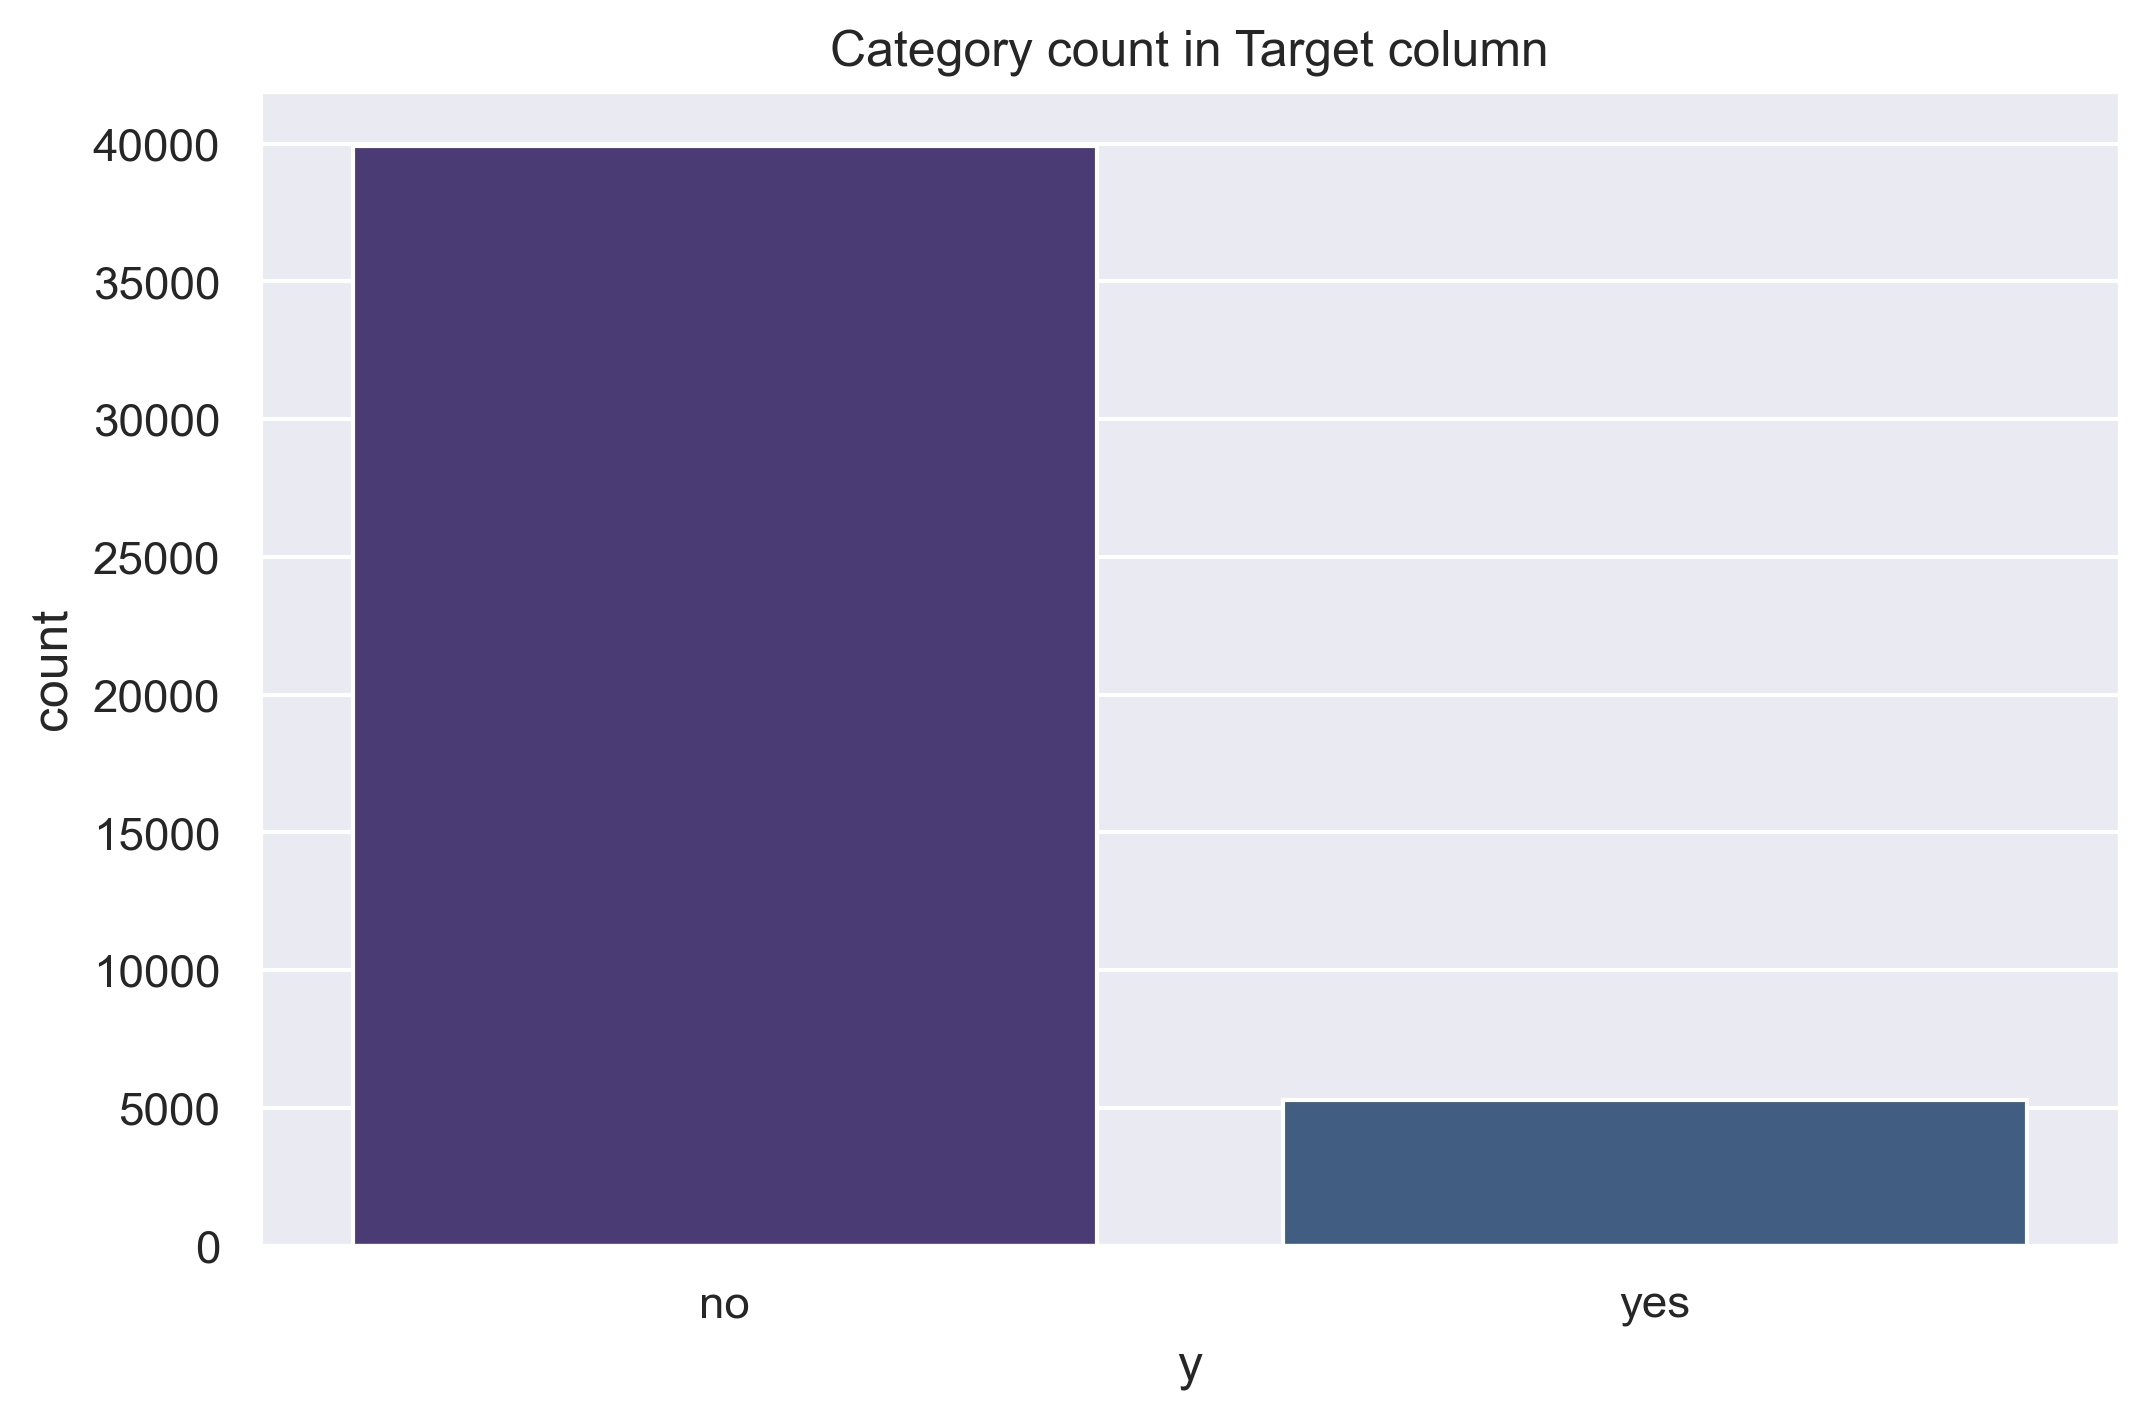

In [15]:
sns.countplot(data = df, x ='y')
plt.title('Category count in Target column') # visualization of target variable

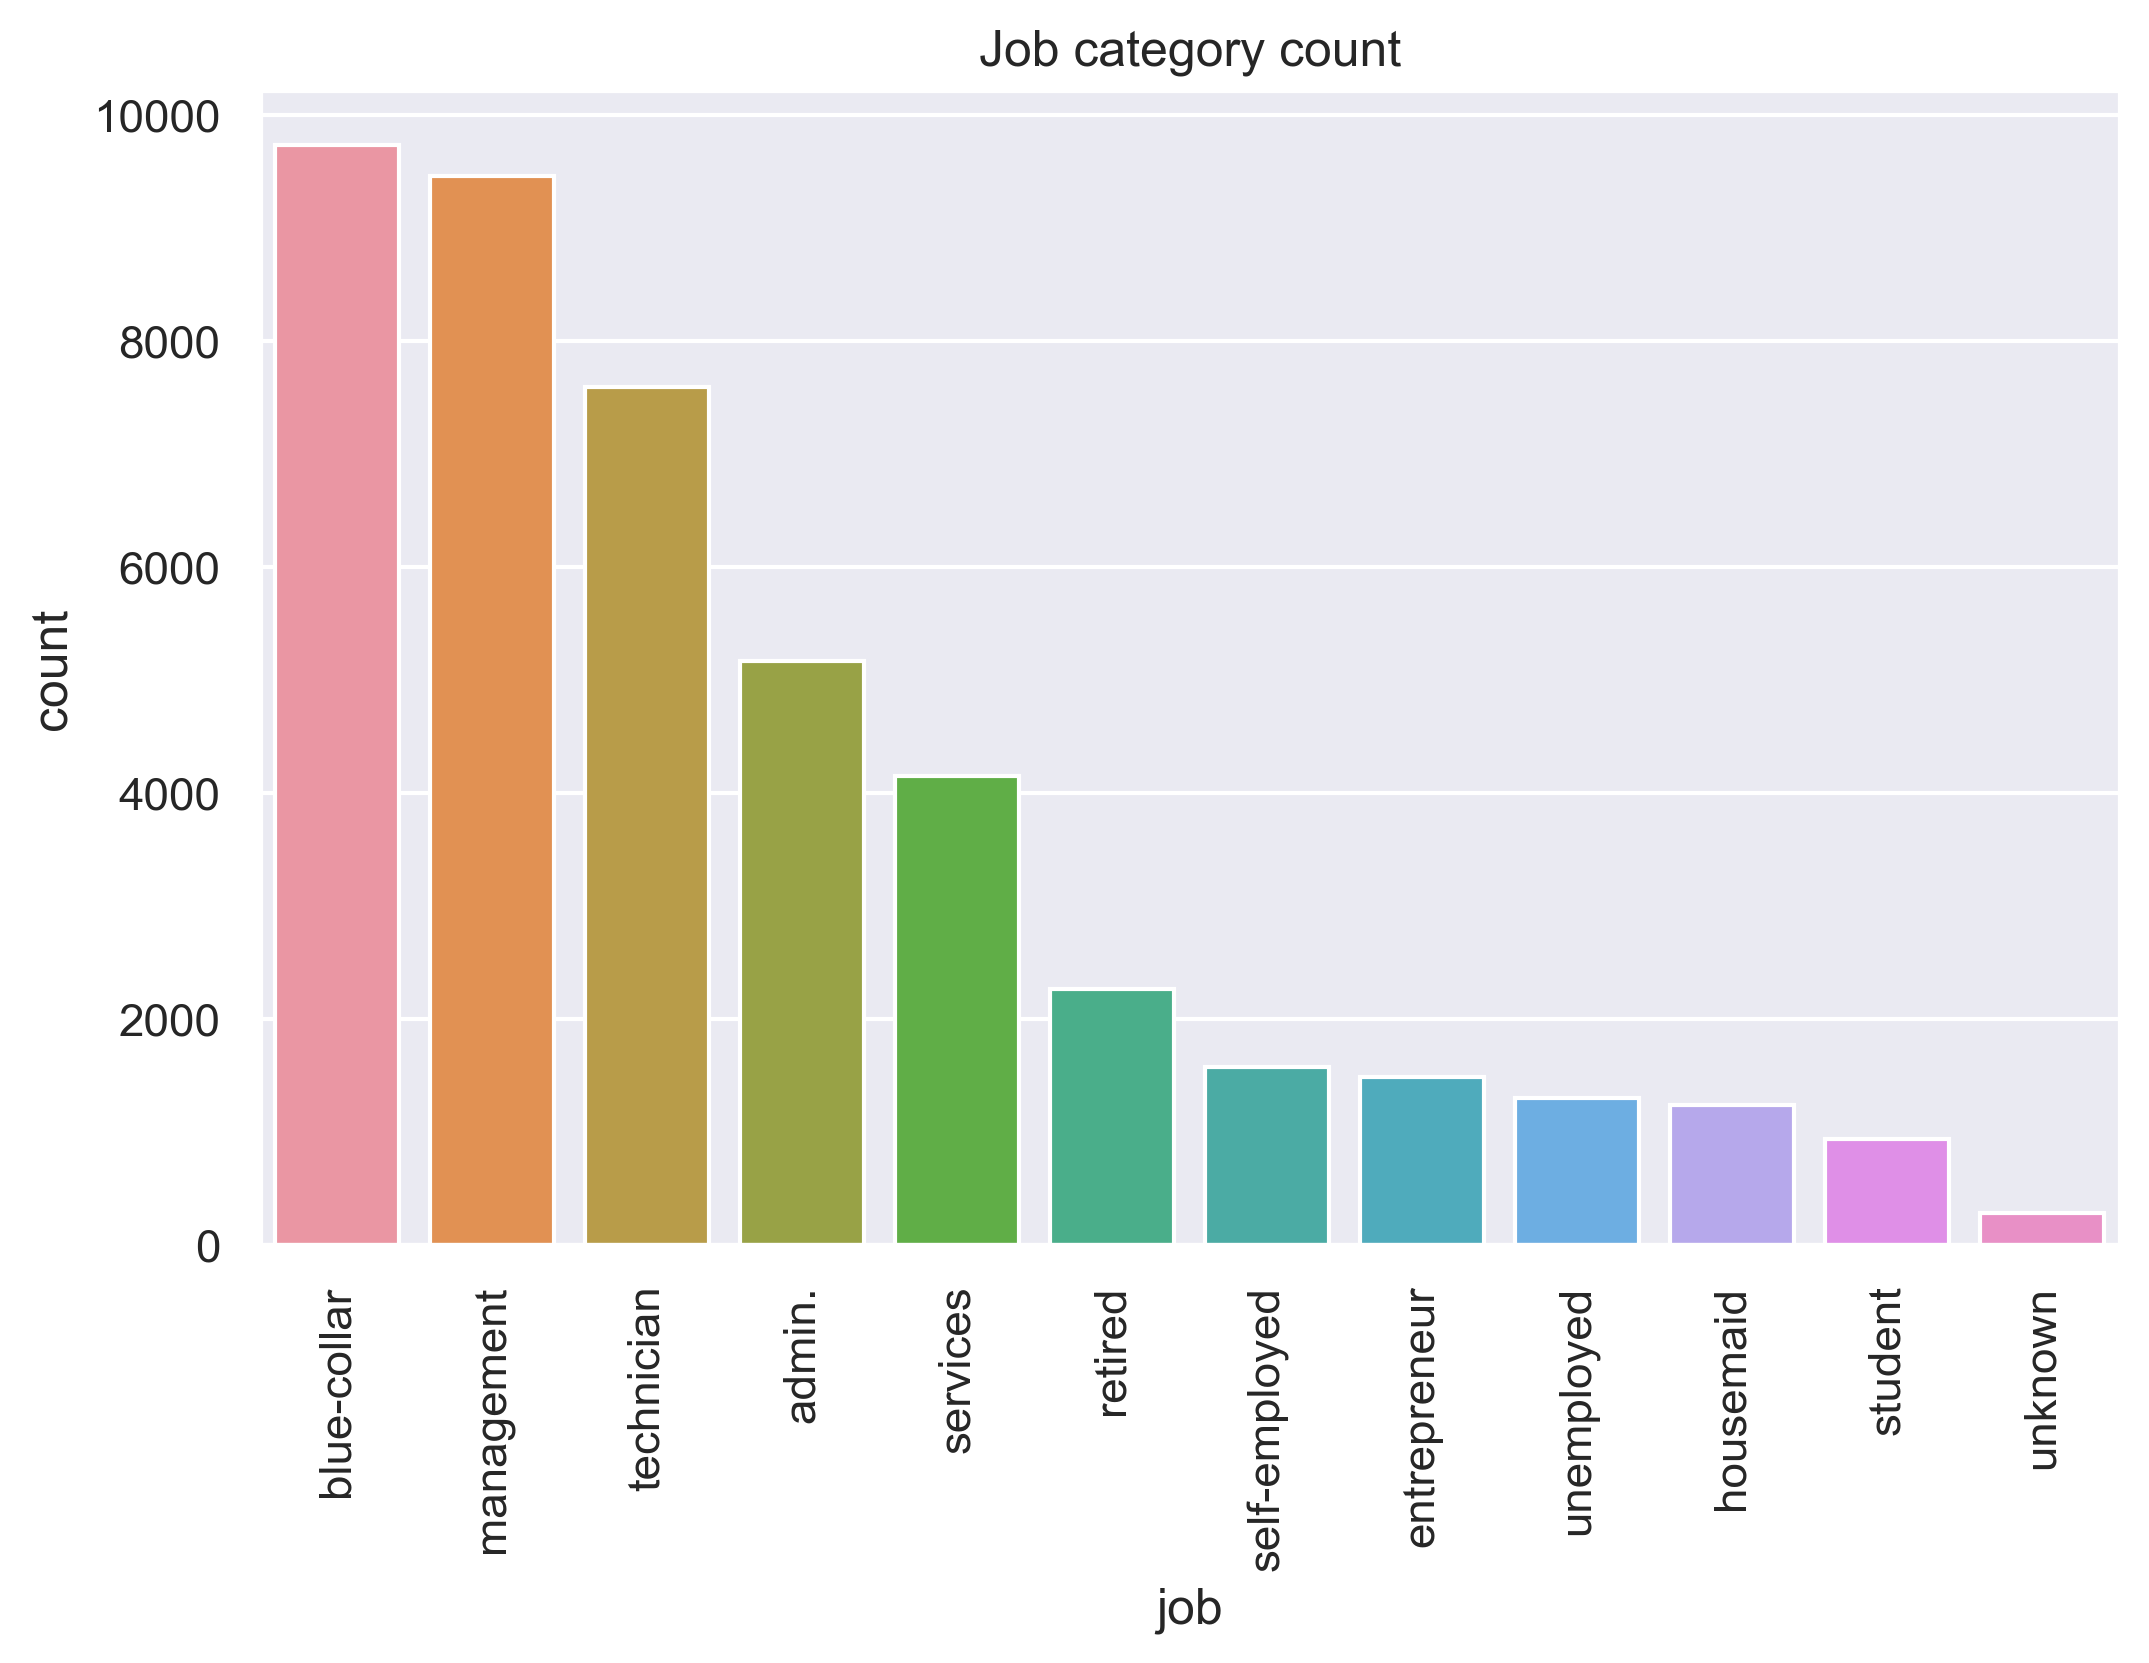

In [16]:
sns.countplot(data = df, x = 'job', order=df['job'].value_counts().index)
plt.xticks(rotation = 90)
plt.title('Job category count')
plt.show()

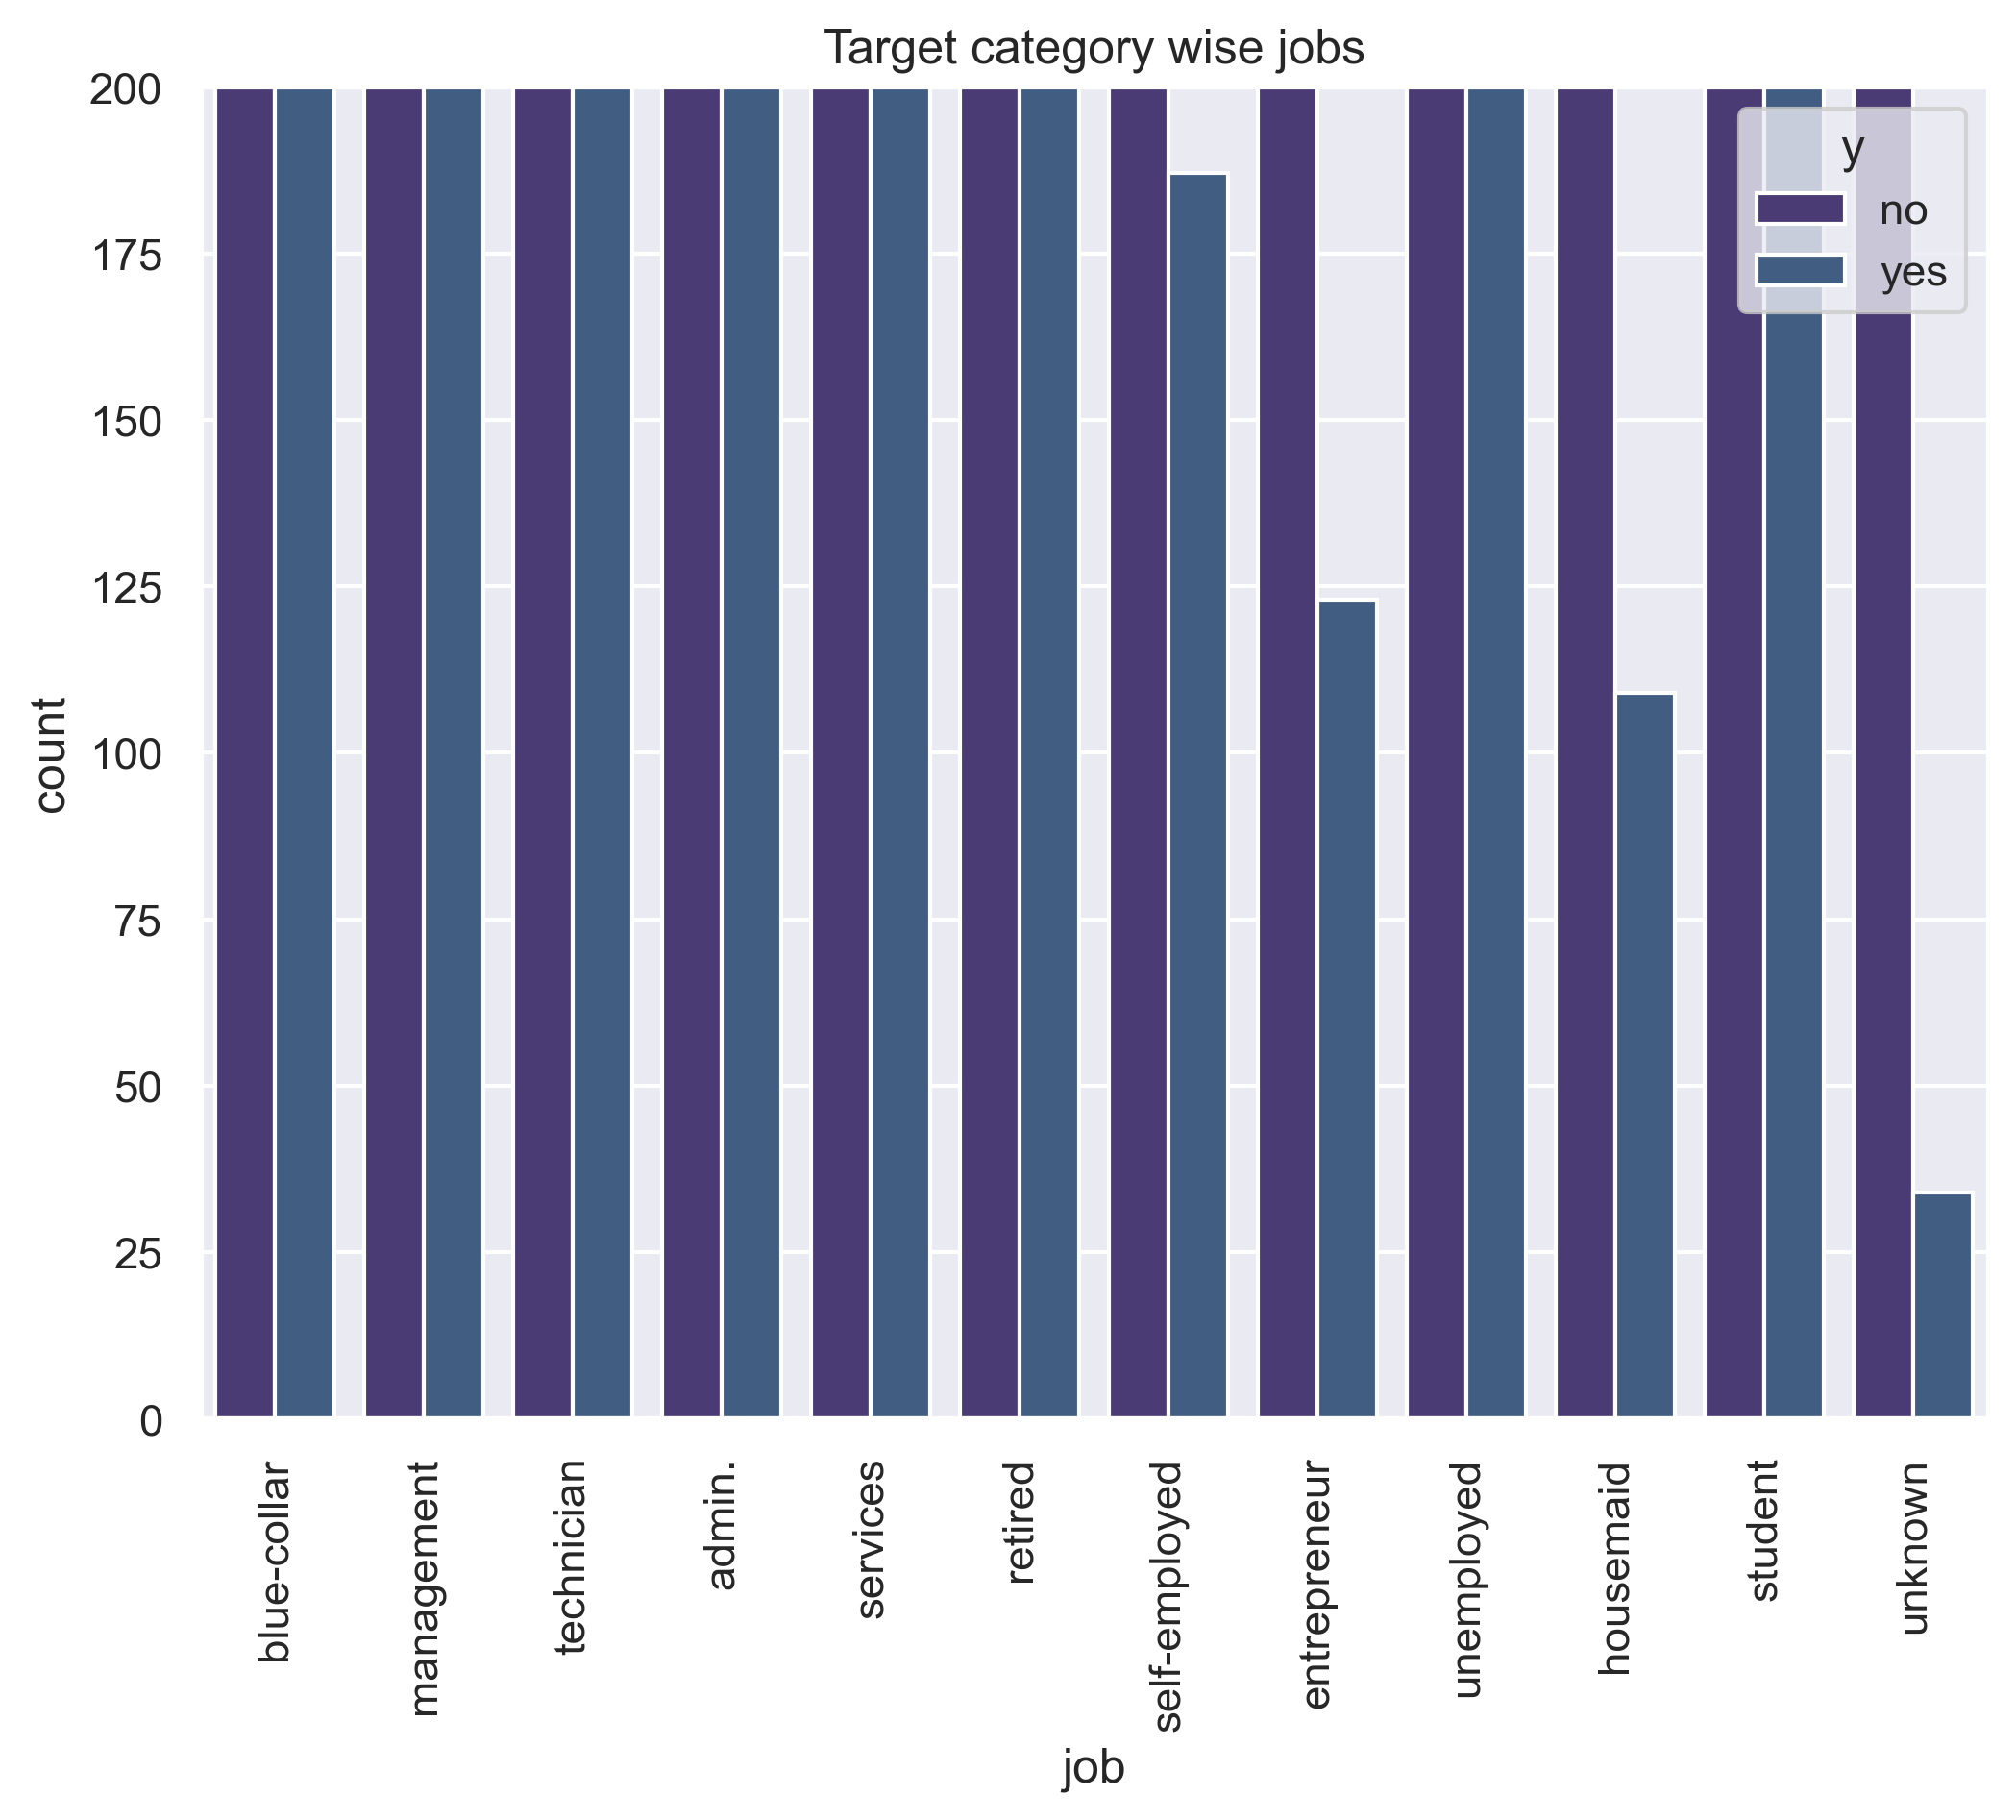

In [17]:
plt.figure(figsize=(8,6))
sns.countplot(data = df, x = 'job',order=df['job'].value_counts().index, hue = 'y')
plt.xticks(rotation=90)
plt.ylim(0,200)
plt.title('Target category wise jobs')
plt.show()

Text(0.5, 1.0, 'marital status category wise percentage')

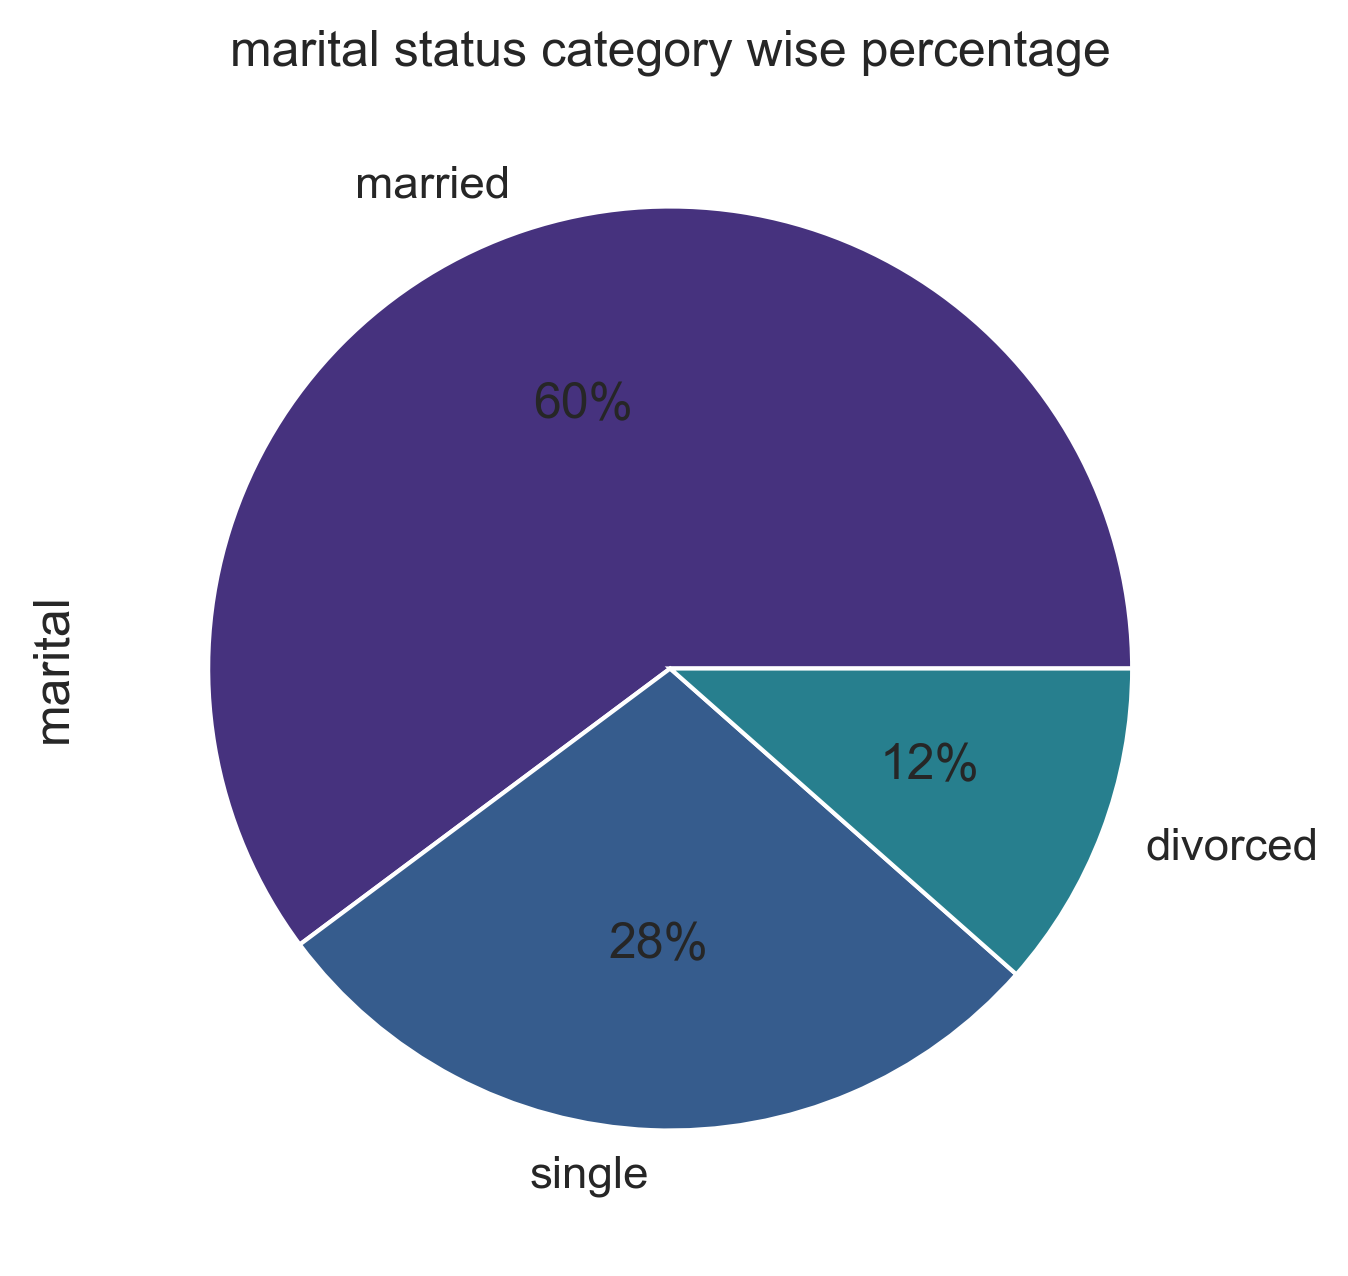

In [19]:
df['marital'].value_counts().plot(kind = 'pie', autopct ='%0.0f%%')
plt.title('marital status category wise percentage')

Text(0.5, 1.0, 'education category percentage')

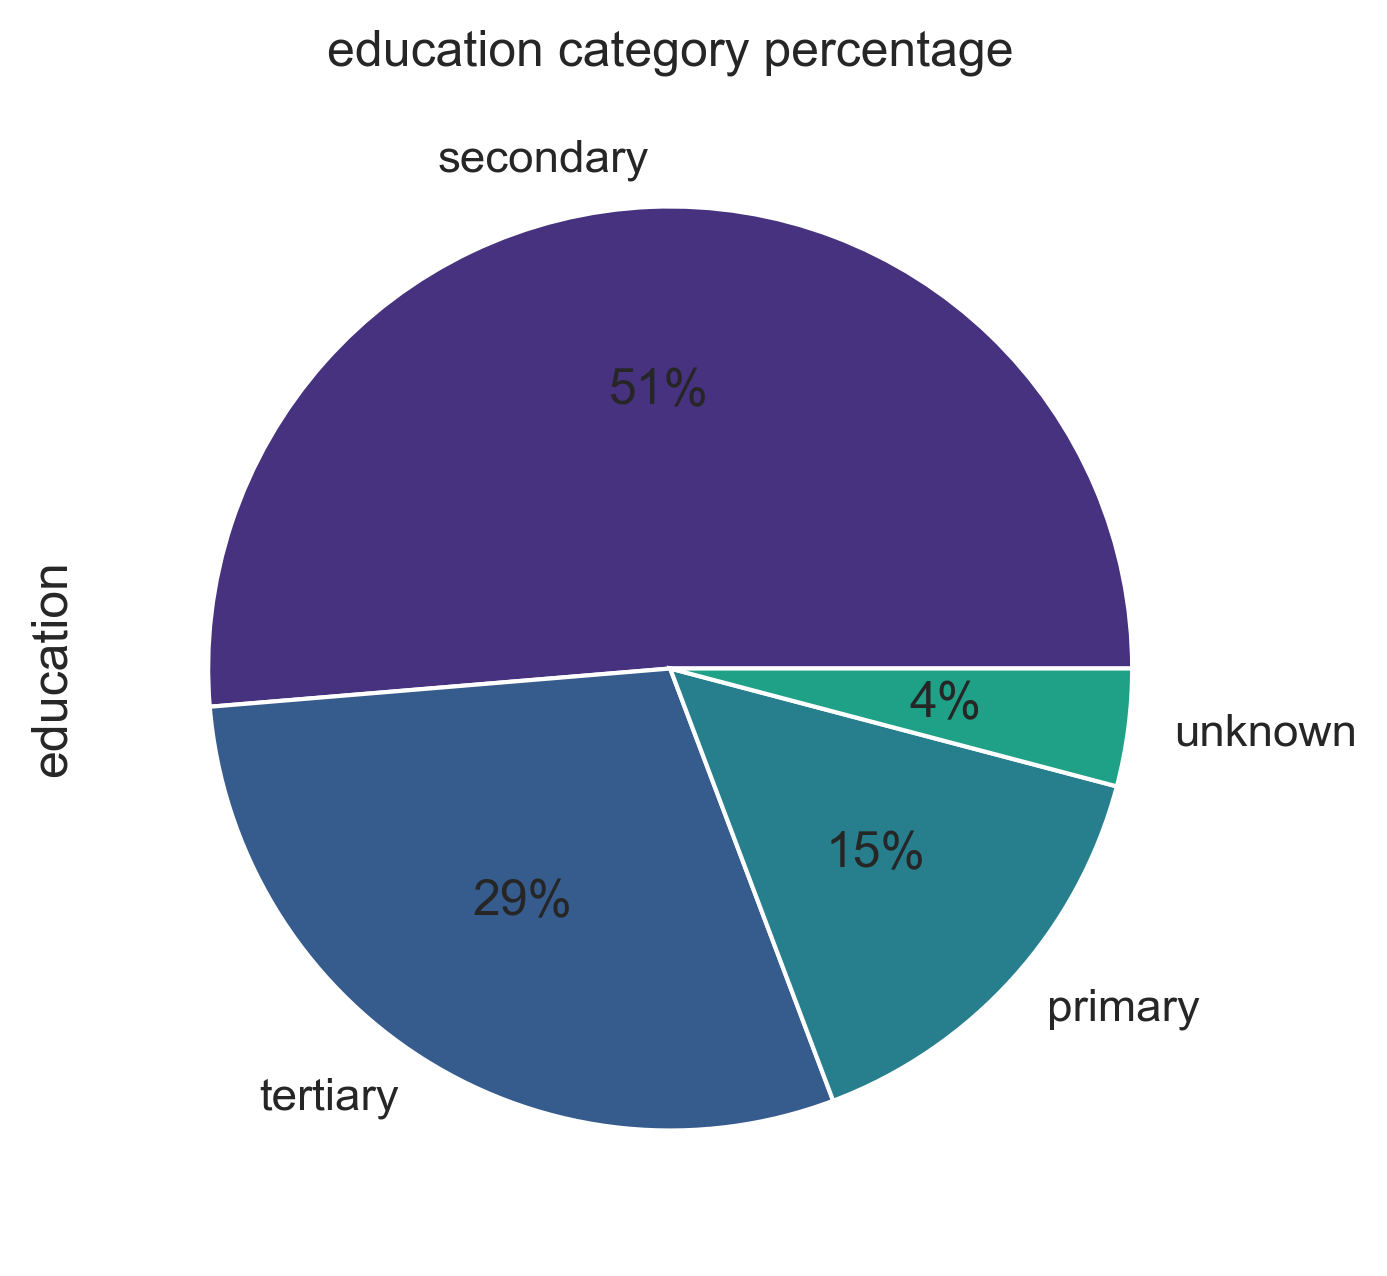

In [22]:
df['education'].value_counts().plot(kind = 'pie', autopct = '%0.0f%%')
plt.title('education category percentage')

In [23]:
# visualizing only object type data
df[df.select_dtypes(include=['object']).any(axis=1)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [24]:
df_categorical = df.select_dtypes('object') # creating a dataset that contains all the object datatype row from main data
df_categorical.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [25]:
df_num  = df.select_dtypes('int64') # creating a dataset that contains all the integer datatype row from main dataframe
df_num.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [32]:
for column in df_categorical:
    df_categorical[column]= encoder.fit_transform(df_categorical[column])
    
# encoding categorical (object)columns using label encoding    

In [33]:
df_categorical.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,4,1,2,0,1,0,2,8,3,0
1,9,2,1,0,1,0,2,8,3,0
2,2,1,1,0,1,1,2,8,3,0
3,1,1,3,0,1,0,2,8,3,0
4,11,2,3,0,0,0,2,8,3,0


In [34]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   job        45211 non-null  int32
 1   marital    45211 non-null  int32
 2   education  45211 non-null  int32
 3   default    45211 non-null  int32
 4   housing    45211 non-null  int32
 5   loan       45211 non-null  int32
 6   contact    45211 non-null  int32
 7   month      45211 non-null  int32
 8   poutcome   45211 non-null  int32
 9   y          45211 non-null  int32
dtypes: int32(10)
memory usage: 1.7 MB


In [45]:
# concatination of integer columns and encoded ccategorical columns
df = pd.concat([df_num,df_categorical],axis = 1)

In [46]:
df.head(5)

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,58,2143,5,261,1,-1,0,4,1,2,0,1,0,2,8,3,0
1,44,29,5,151,1,-1,0,9,2,1,0,1,0,2,8,3,0
2,33,2,5,76,1,-1,0,2,1,1,0,1,1,2,8,3,0
3,47,1506,5,92,1,-1,0,1,1,3,0,1,0,2,8,3,0
4,33,1,5,198,1,-1,0,11,2,3,0,0,0,2,8,3,0


In [53]:
# splitting the data into feature and target variable
x = df.drop('y',axis = 1)
y = df['y']

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [55]:
x_train

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome
3734,26,102,16,46,1,-1,0,1,2,0,0,1,0,2,8,3
28119,43,182,28,152,1,-1,0,4,1,2,0,0,0,0,4,3
36942,37,807,12,807,3,172,4,9,1,1,0,1,0,0,8,0
4710,32,80,20,614,2,-1,0,1,1,0,0,1,0,2,8,3
26402,33,0,20,232,1,-1,0,2,1,2,0,0,0,0,9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12363,53,931,27,159,2,-1,0,7,1,0,0,0,0,2,6,3
5695,50,1651,26,41,2,-1,0,0,2,1,0,1,0,2,8,3
8006,33,-244,2,63,2,-1,0,9,2,1,0,1,0,2,6,3
17745,52,-299,29,110,2,-1,0,4,0,2,0,0,0,0,5,3


In [56]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

In [57]:
# scaling the data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [58]:
model = LogisticRegression()

In [59]:
model.fit(x_train,y_train)

LogisticRegression()

## In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [60]:
model.coef_

array([[ 0.09228328,  0.05831978, -0.0328136 ,  0.99848012, -0.40177749,
         0.36089756,  0.20509605,  0.03131662,  0.1375262 ,  0.16088494,
        -0.05679979, -0.50864785, -0.24231832, -0.57501367,  0.11106299,
         0.21311831]])

In [61]:
# making predictions based on x_test
y_pred = model.predict(x_test)

In [62]:
# accuracy of model
accuracy_score(y_test,y_pred)

0.8909653875926131

In [63]:
confusion_matrix(y_test,y_pred)

array([[7805,  139],
       [ 847,  252]], dtype=int64)

<Axes: >

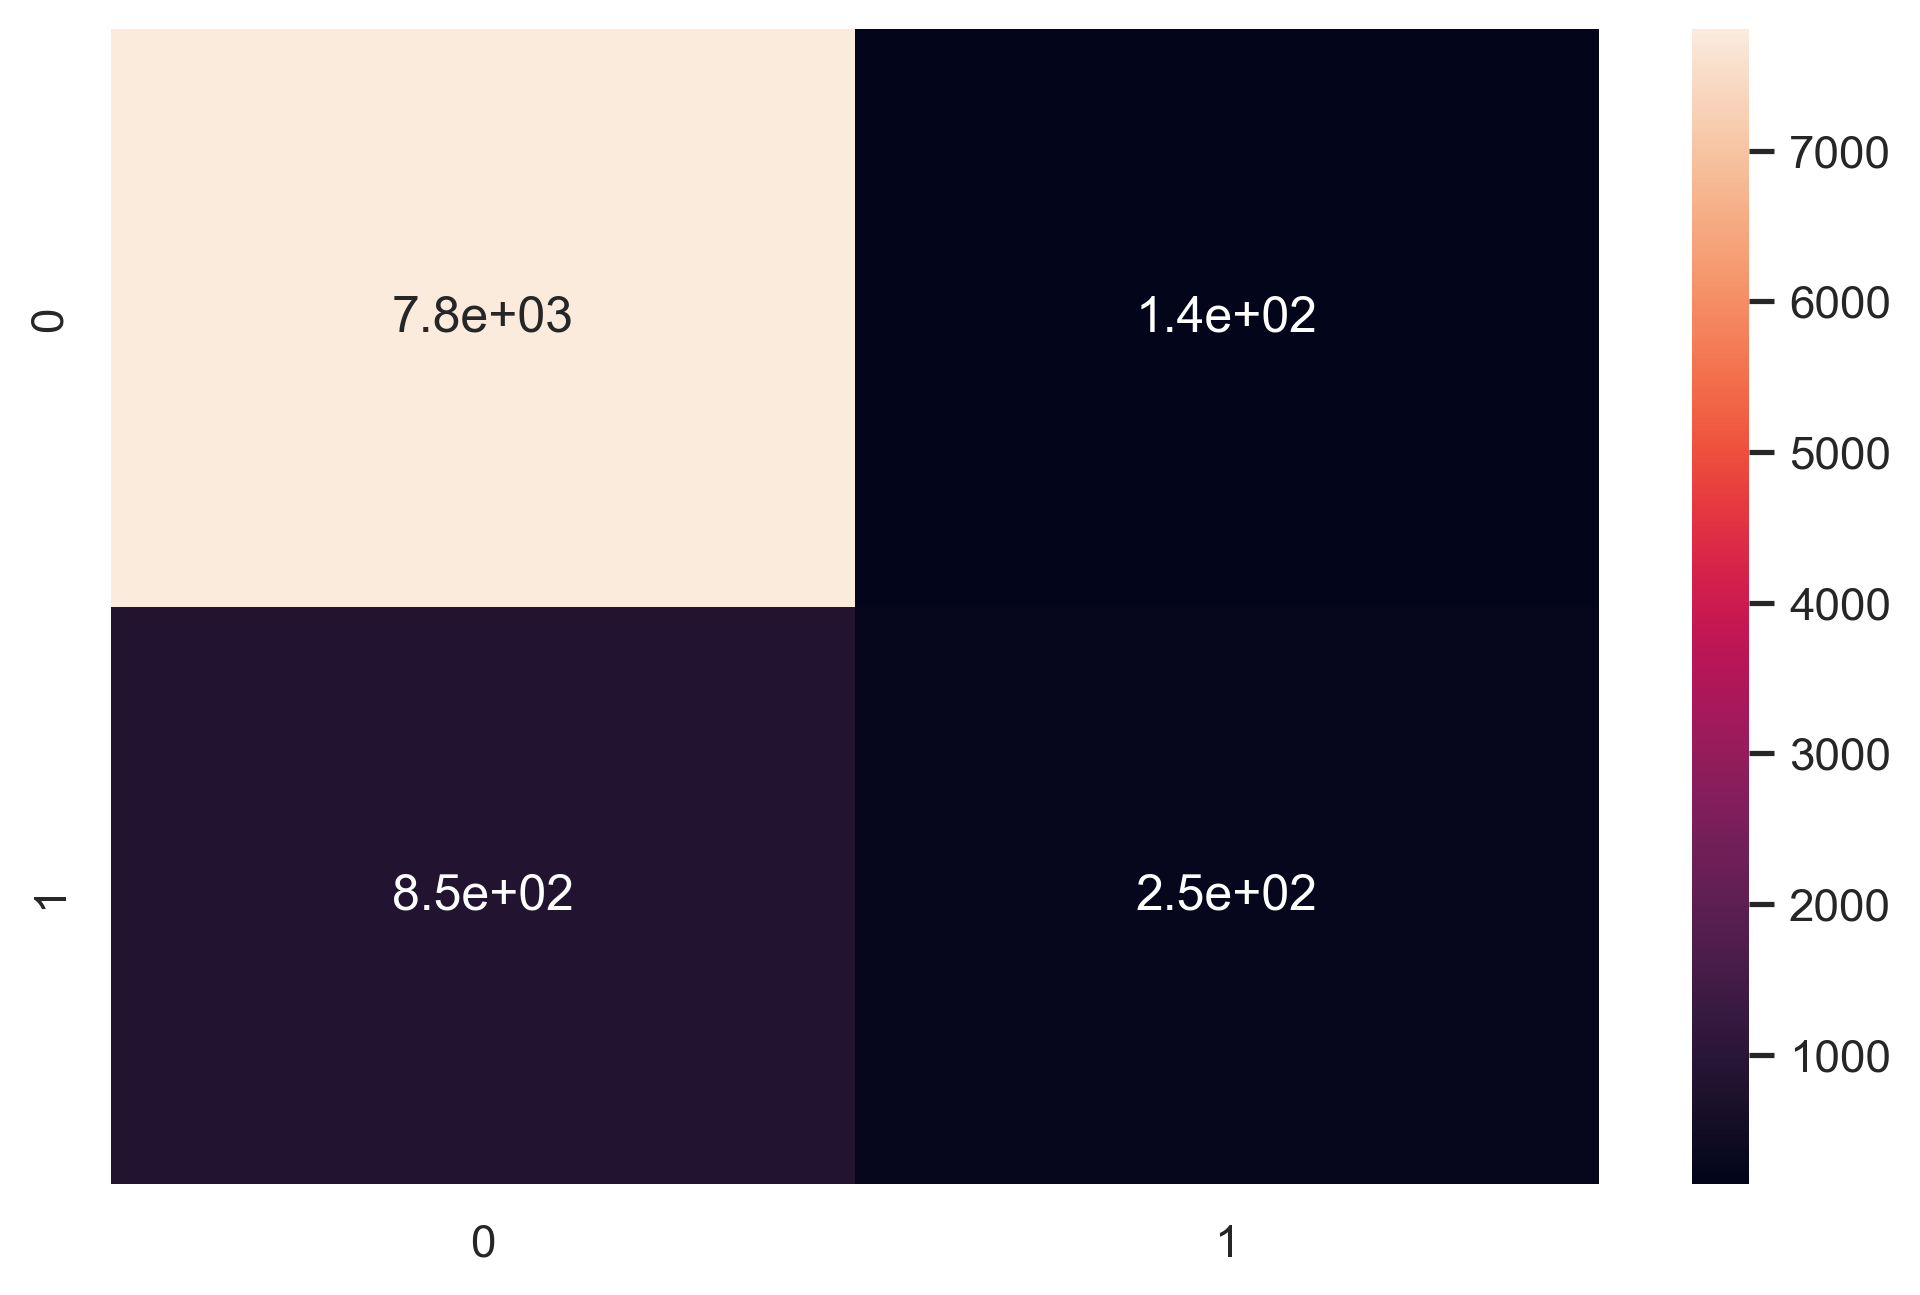

In [64]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7944
           1       0.64      0.23      0.34      1099

    accuracy                           0.89      9043
   macro avg       0.77      0.61      0.64      9043
weighted avg       0.87      0.89      0.87      9043



In [67]:
### Interpretation :-

## As the data is imbalanced we can't directly relying on just accuracy will be a mistake, therefore we check for Recall and precsision values
## As we can see Recall and precision for 0 is very good due to its higher count than 1's, hence model can predict for 0 values with accuratly
## But recall and precision for 1 is poor due to imbalance in count of 1's and 0's

In [68]:
# generating probability estimates
proba = model.predict_proba(x_test)[:,1]
proba

array([0.11037539, 0.13141277, 0.01216471, ..., 0.1372033 , 0.08558196,
       0.43246347])

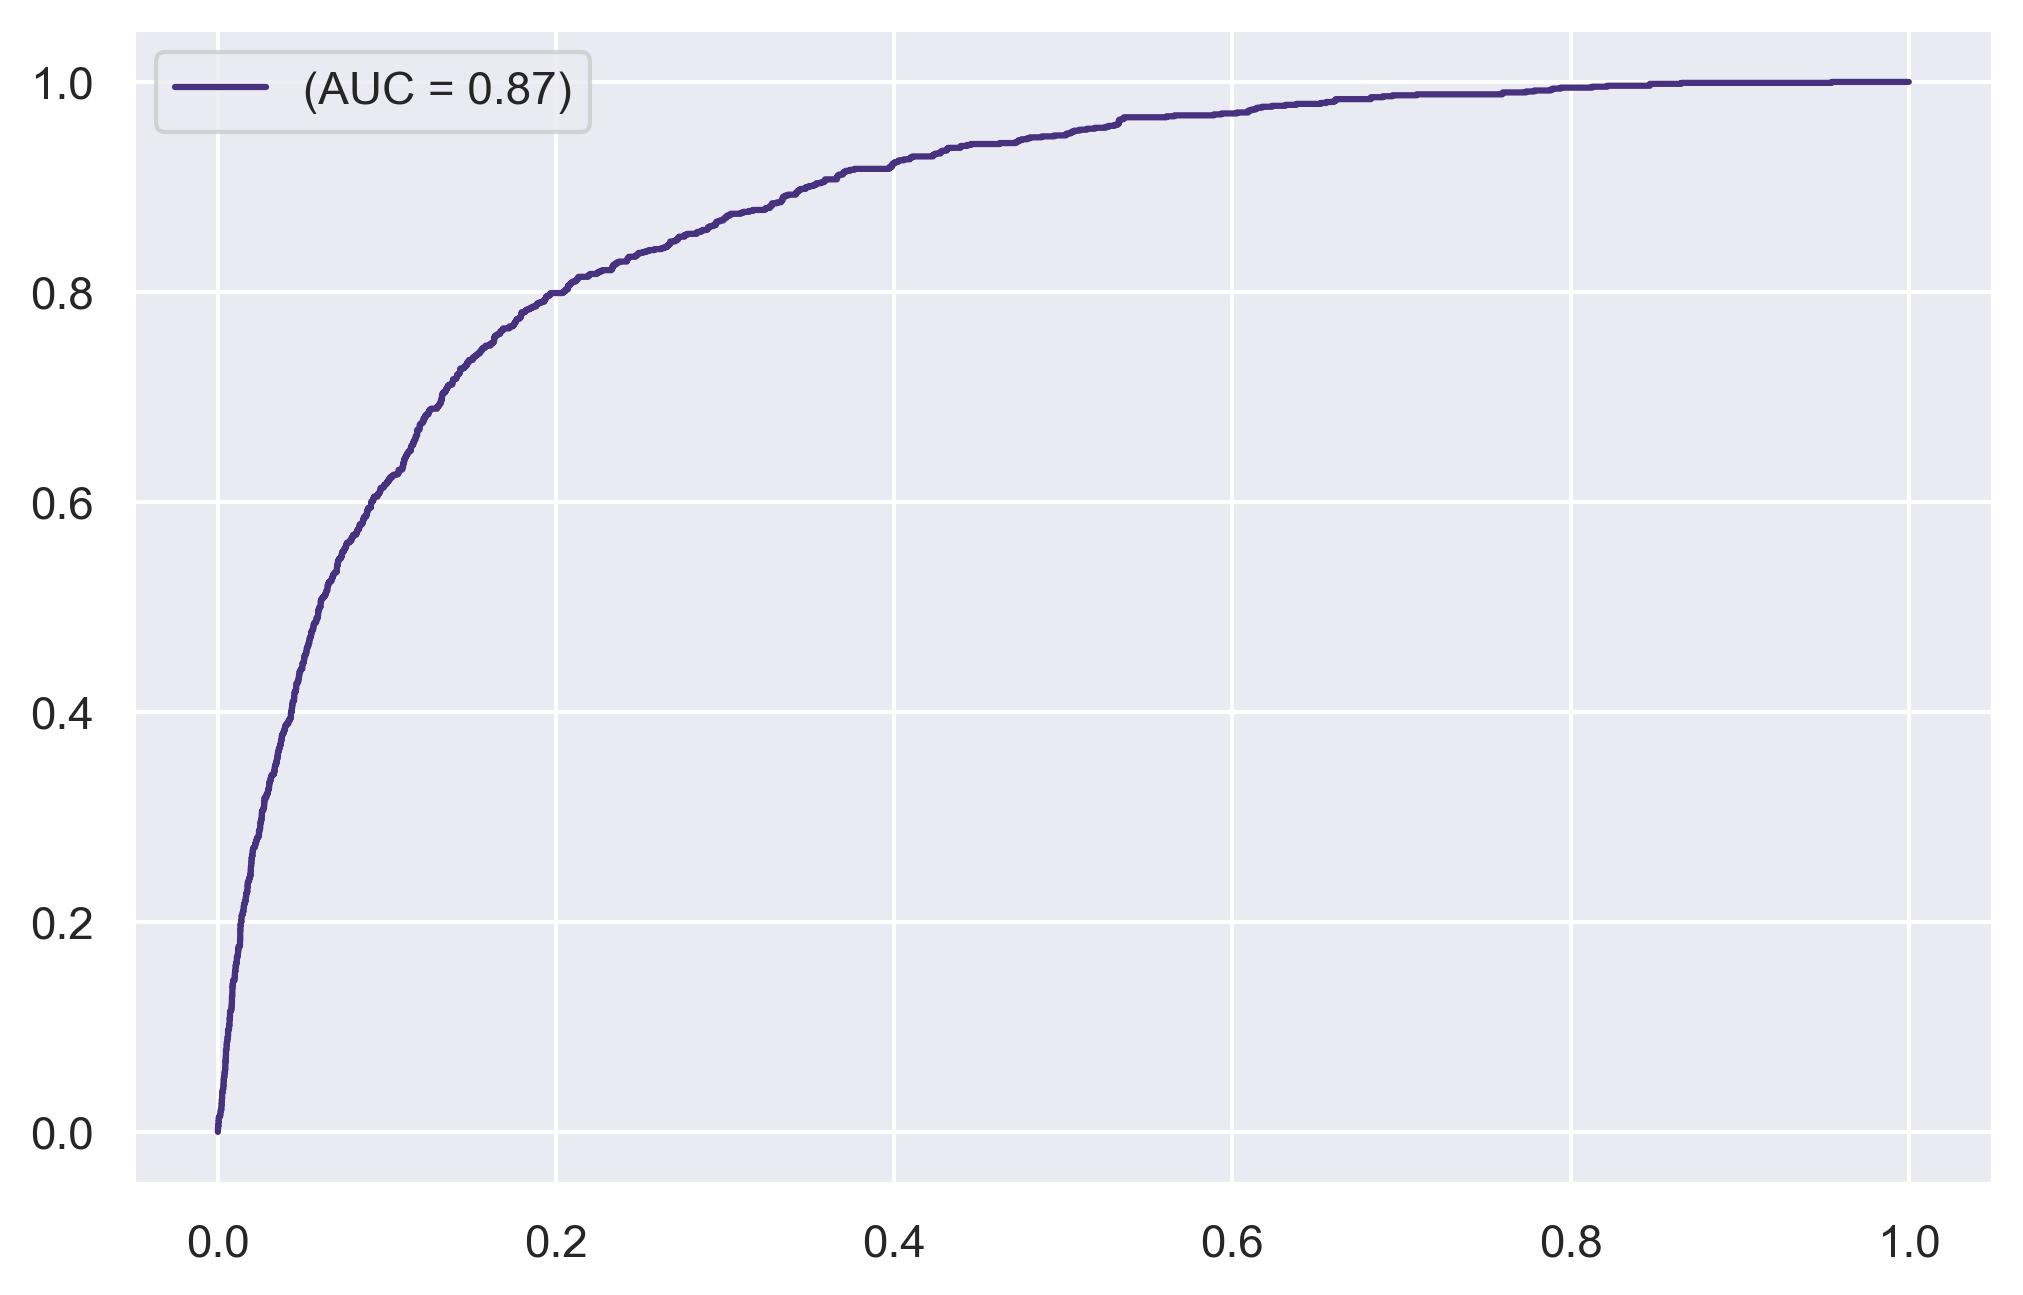

In [69]:
# creating ROC curve
auc = roc_auc_score(y_test,proba)
fpr,tpr, threshold = roc_curve(y_test,proba)
plt.plot(fpr,tpr,label = '(AUC = %0.2f)'%auc)
plt.legend()